In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import colorsys
from PIL import Image

In [2]:
def image_histogram(img_path, 
                     plot=True, 
                     plot_raw = True, 
                     max_intensity = 1000000, 
                     print_threshold_diagnostics = False, 
                     color_width = 1000, 
                     return_proportion = False):
    """ Takes in an image, and plots a histogram of color population against (hue,lightness) pairs. 
    If an image has a population of n (n = color_width) pixels with a specific 
    (hue,lightness) pair that make up more than pct_threshold of an image, we tag that image as artificial. 

    Parameters
    ----------
    img_folder: Path or str
    Fold with images to examine.
    plot: bool
    Plot histogram or not.
    plot_raw: bool
    Plot raw images or not.
    max_intensity: int
    Ceiling value for the hue:lightness pair populations. 
    This value will affect the pixel proportion if too low. 
    print_threshold_diagnostics: bool
    Prints diagnositic information (number of hue/lightness pairs, 
    how many are accounted for in calculating the proportion of the final image.)
    color_width: int
    How many of the most populous hue:lightness pairs to sum together to 
    determine the proportion of the final image they occupy. 
    return_proportion: bool
    Should the function return the color proportion coverage value. 

    Returns:
    ----------
    Color proportion coverage value (if return_proportion=True)
    Histogram (if plot=True)
    Raw Image (if plot_raw=True)
    """
    # Open image and get dimensions
    img_file = Image.open(img_path).convert('RGB')
    img = img_file.load()
    [xs,ys] = img_file.size
    max_intensity = max_intensity
    hues = {}

    # For each pixel in the image file
    for x in range(0, xs):
        for y in range(0, ys):
            # Get the RGB color of the pixel
            [r, g, b] = img[x, y]
            # Normalize pixel color values
            r /= 255.0
            g /= 255.0
            b /= 255.0
            # Convert RGB color to HSL
            [h, l, s] = colorsys.rgb_to_hls(r, g, b)
            # Count how many pixels have matching (h, l)
            if h not in hues:
                hues[h] = {}
            if l not in hues[h]:
                hues[h][l] = 1
            else:
                if hues[h][l] < max_intensity:
                      hues[h][l] += 1

    # Decompose the hues object into a set of one dimensional arrays
    h_ = []
    l_ = []
    i = []
    colours = []

    for h in hues:
        for l in hues[h]:
            h_.append(h)
            l_.append(l)
            i.append(hues[h][l])
            [r, g, b] = colorsys.hls_to_rgb(h, l, 1)
            colours.append([r, g, b])

    # Plot if wanted
    raw_image = Image.open(img_path)
    raw_image = np.asarray(raw_image)
    if plot==True:
        fig = plt.figure(figsize=(12,5))
        fig.set_facecolor("white")
        ax = plt.subplot2grid((2,6), (0,0), colspan=4, rowspan=2, projection='3d')
        ax.scatter(h_, l_, i, s=30, c=colours, lw=0.5, edgecolors='black')
        ax.set_xlabel('Hue')
        ax.set_ylabel('Lightness')
        ax.set_zlabel('Population')
        # Plot raw image if wanted
        if plot_raw == True:
            ax2 = plt.subplot2grid((2,6), (0,4), colspan=2, rowspan=2)
            ax2.imshow(raw_image)  
            ax2.title.set_text(f'Raw Image: {img_path}')
        plt.tight_layout()
        plt.show()
  
    # Determine if the image we're examining is artificially generated
    n_greatest = sum(sorted(i, reverse=True)[:color_width])
    picture_size = xs*ys
    if print_threshold_diagnostics == True:
        print(f'There are {len(i)} hue/lightness pairs in this image.')
        print(f'Population of {color_width} hue/lightness pairs with the largest populations = {n_greatest}')
        print(f'This represents {n_greatest/picture_size*100:.2f}% of the total pixels in the image.')

    if return_proportion == True:
        return n_greatest/picture_size

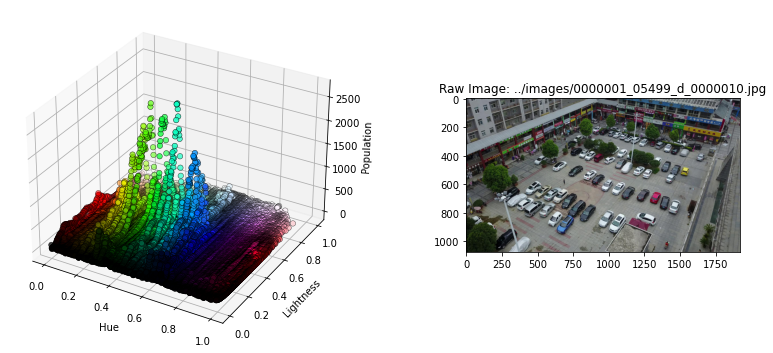

There are 158287 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 674002
This represents 32.50% of the total pixels in the image.


In [3]:
image_histogram("../images/0000001_05499_d_0000010.jpg", print_threshold_diagnostics = True)

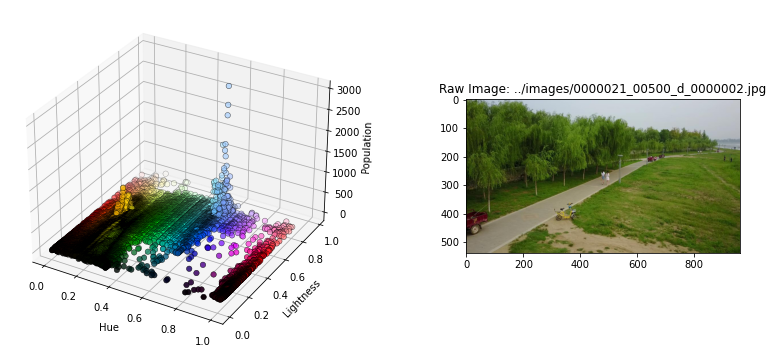

There are 59515 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 133592
This represents 25.77% of the total pixels in the image.


In [4]:
image_histogram("../images/0000021_00500_d_0000002.jpg", print_threshold_diagnostics = True)

In [36]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("../images/0000021_00500_d_0000002.jpg")

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('../images/0000021_00500_d_0000002.png')

factor = 0.1 #darkens the image
im_output = enhancer.enhance(factor)
im_output.save('../images/0000021_00500_d_0000002_darkened.png')

factor = 5 #brightens the image
im_output = enhancer.enhance(factor)
im_output.save('../images/0000021_00500_d_0000002_brightened.png')

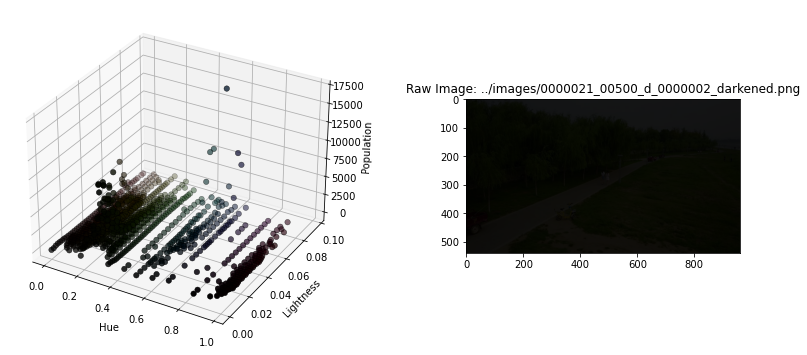

There are 1188 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 518212
This represents 99.96% of the total pixels in the image.


In [6]:
image_histogram("../images/0000021_00500_d_0000002_darkened.png", print_threshold_diagnostics = True)

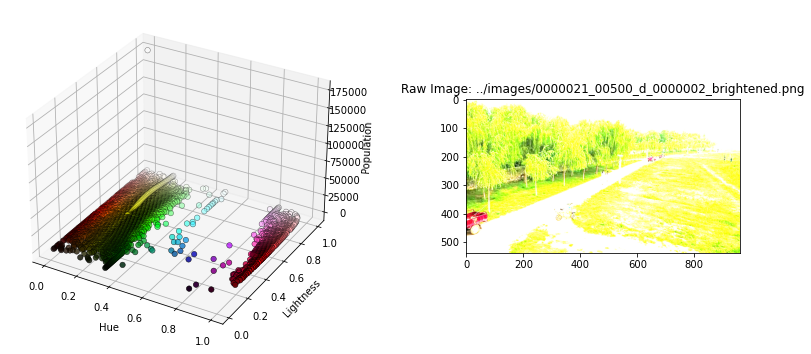

There are 7258 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 494007
This represents 95.29% of the total pixels in the image.


In [7]:
image_histogram("../images/0000021_00500_d_0000002_brightened.png", print_threshold_diagnostics = True)

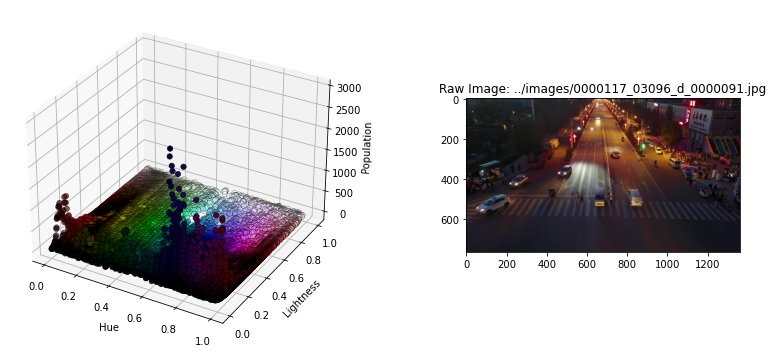

There are 122683 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 437978
This represents 42.10% of the total pixels in the image.


In [8]:
image_histogram("../images/0000117_03096_d_0000091.jpg", print_threshold_diagnostics = True)

In [9]:
import cv2
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = rgb_image.shape[0]* rgb_image.shape[1]
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

In [10]:
from PIL import Image, ImageOps
import glob

def slow_horizontal_variance(im):
    '''Return average variance of horizontal lines of a grayscale image'''
    im = ImageOps.grayscale(im)
    width, height = im.size
    if not width or not height: return 0
    vars = []
    pix = im.load()
    for y in range(height):
        row = [pix[x,y] for x in range(width)]
        mean = sum(row)/width
        variance = sum([(x-mean)**2 for x in row])/width
        vars.append(variance)
    return sum(vars)/height

In [11]:
import os
path = "../images/"
items = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]


../images/0000001_05499_d_0000010.jpg


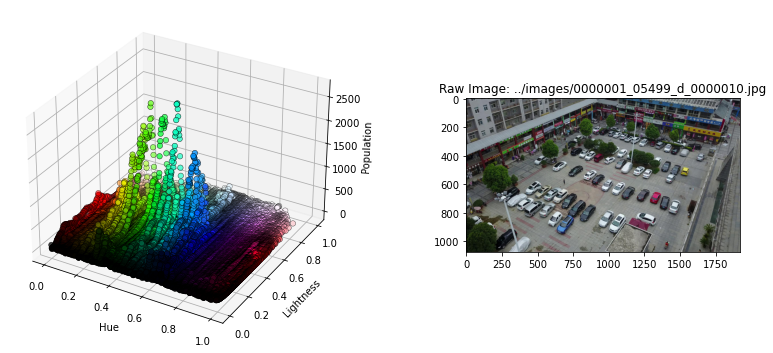

There are 158287 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 674002
This represents 32.50% of the total pixels in the image.
Average brightnes: 104.73579812885802
 2208 - SHARP - 0000001_05499_d_0000010.jpg

../images/0000021_00500_d_0000002.jpg


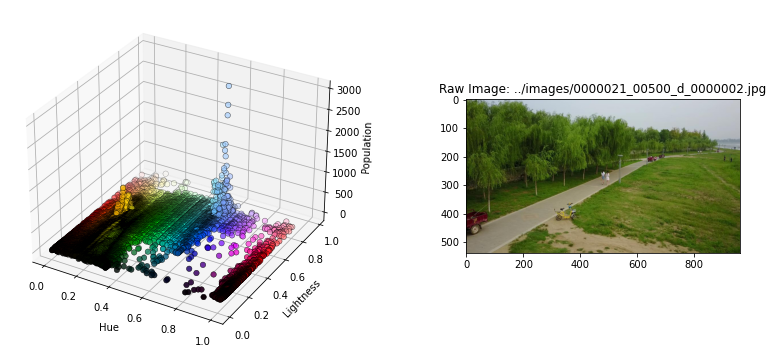

There are 59515 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 133592
This represents 25.77% of the total pixels in the image.
Average brightnes: 113.39066358024691
 1453 - SHARP - 0000021_00500_d_0000002.jpg

../images/0000021_00500_d_0000002.png


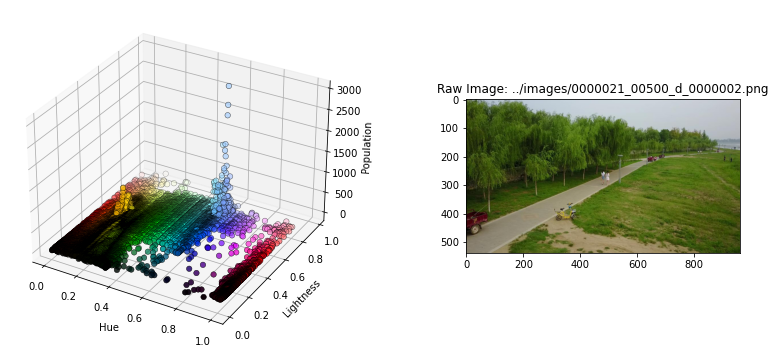

There are 59515 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 133592
This represents 25.77% of the total pixels in the image.
Average brightnes: 0.4446692648051698
 1453 - SHARP - 0000021_00500_d_0000002.png

../images/0000021_00500_d_0000002_brightened.png


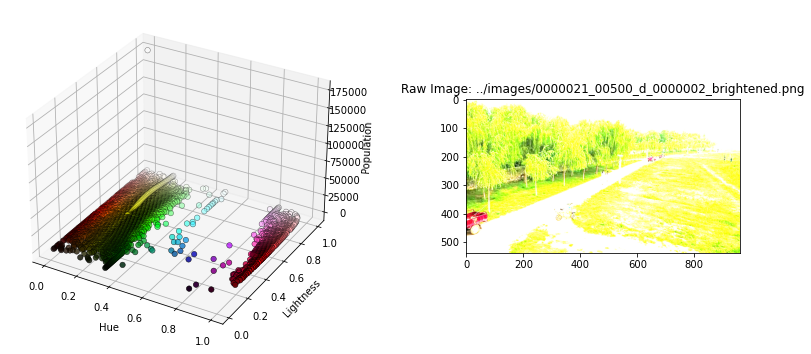

There are 7258 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 494007
This represents 95.29% of the total pixels in the image.
Average brightnes: 0.9823788339120371
  697 - SHARP - 0000021_00500_d_0000002_brightened.png

../images/0000021_00500_d_0000002_darkened.png


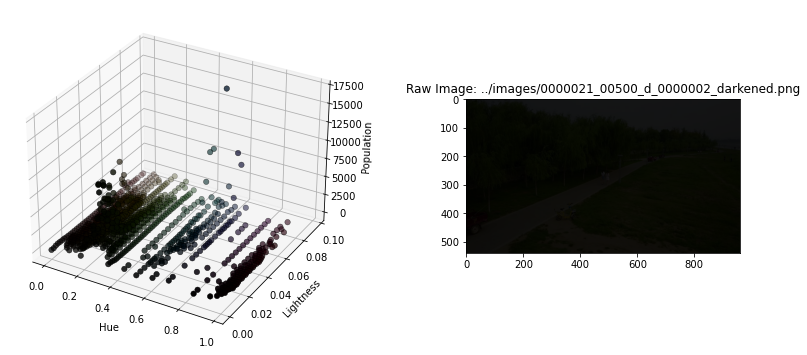

There are 1188 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 518212
This represents 99.96% of the total pixels in the image.
Average brightnes: 0.042687174479166666
   15 - FOGGY - 0000021_00500_d_0000002_darkened.png

../images/0000055_00000_d_0000109.jpg


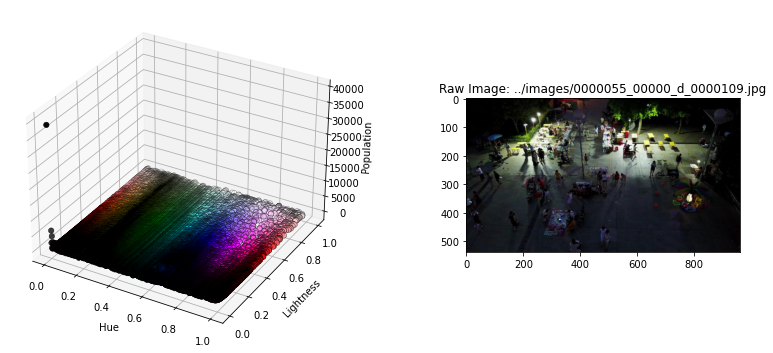

There are 72057 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 289448
This represents 55.83% of the total pixels in the image.
Average brightnes: 47.678273533950616
 1764 - SHARP - 0000055_00000_d_0000109.jpg

../images/0000069_00713_d_0000003.jpg


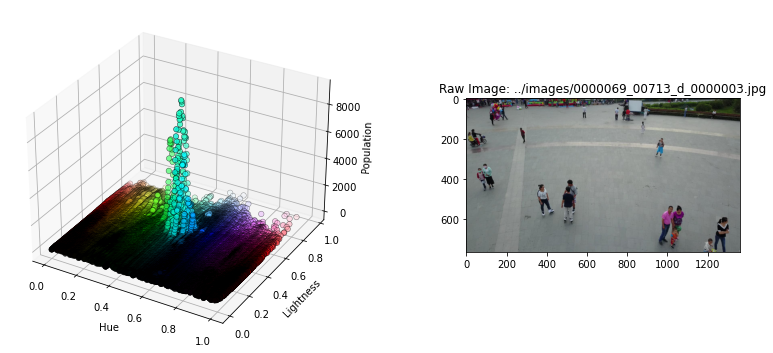

There are 66508 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 848927
This represents 81.60% of the total pixels in the image.
Average brightnes: 131.34292579777008
  780 - SHARP - 0000069_00713_d_0000003.jpg

../images/0000117_00112_d_0000087.jpg


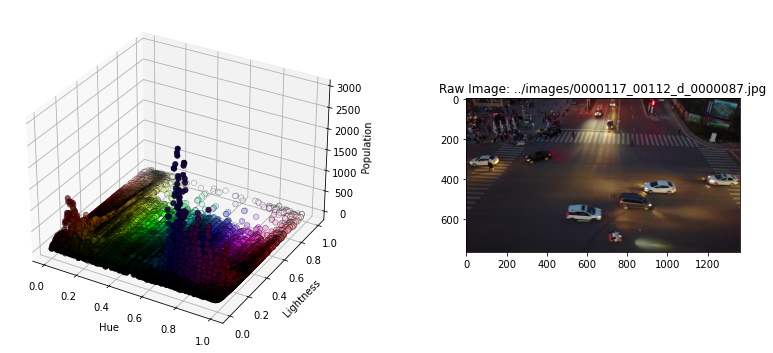

There are 85511 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 432425
This represents 41.56% of the total pixels in the image.
Average brightnes: 61.187023260284505
  799 - SHARP - 0000117_00112_d_0000087.jpg

../images/0000117_01326_d_0000088.jpg


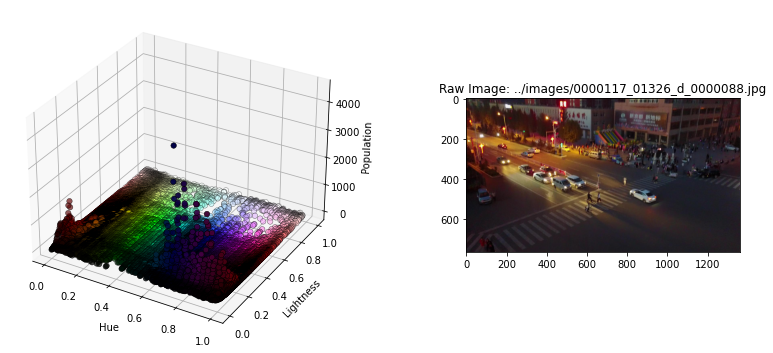

There are 134505 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 421267
This represents 40.49% of the total pixels in the image.
Average brightnes: 66.74437235678585
  970 - SHARP - 0000117_01326_d_0000088.jpg

../images/0000117_01731_d_0000089.jpg


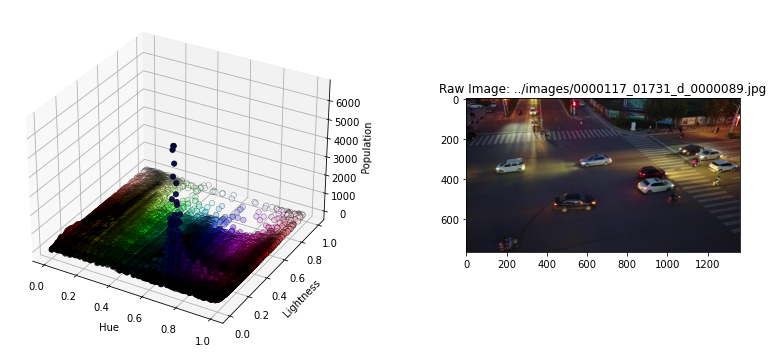

There are 110214 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 465499
This represents 44.74% of the total pixels in the image.
Average brightnes: 61.8894723183391
  733 - SHARP - 0000117_01731_d_0000089.jpg

../images/0000117_02708_d_0000090.jpg


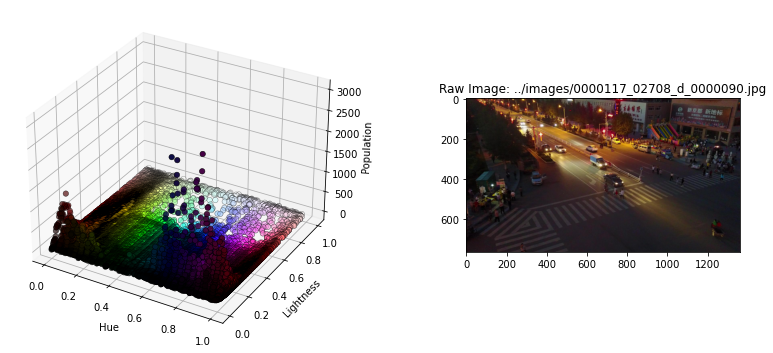

There are 131350 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 425333
This represents 40.88% of the total pixels in the image.
Average brightnes: 61.00976643598616
 1049 - SHARP - 0000117_02708_d_0000090.jpg

../images/0000117_03096_d_0000091.jpg


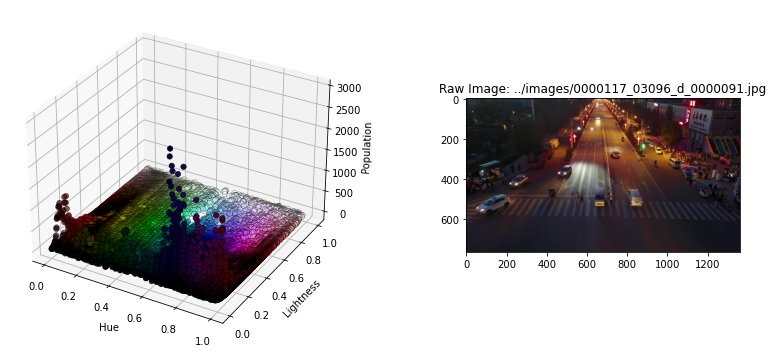

There are 122683 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 437978
This represents 42.10% of the total pixels in the image.
Average brightnes: 60.6114138792772
 1024 - SHARP - 0000117_03096_d_0000091.jpg

../images/0000216_00520_d_0000001.jpg


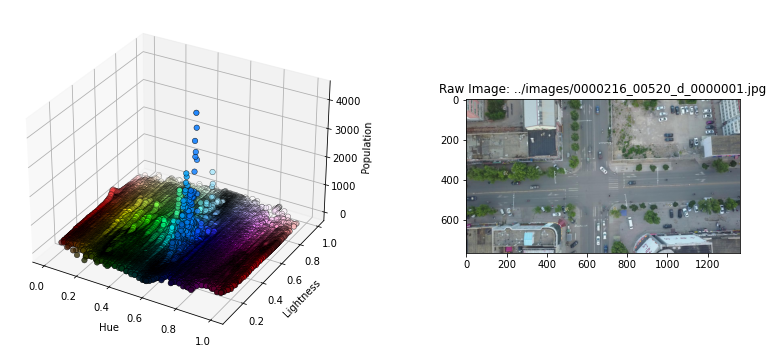

There are 77419 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 401273
This represents 38.57% of the total pixels in the image.
Average brightnes: 131.75349192618225
 1157 - SHARP - 0000216_00520_d_0000001.jpg

../images/0000276_05001_d_0000532.jpg


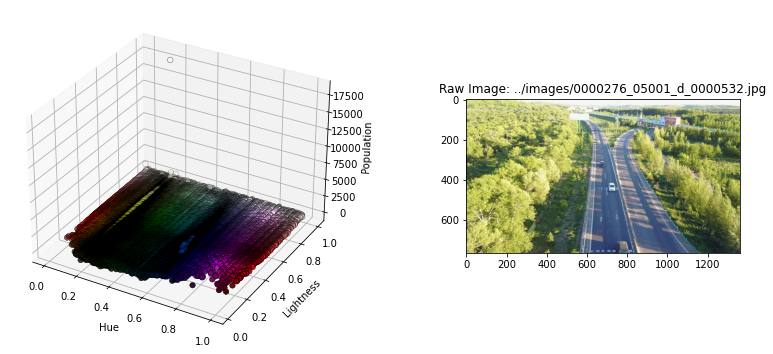

There are 182232 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 137382
This represents 13.20% of the total pixels in the image.
Average brightnes: 151.51125432525953
 2443 - SHARP - 0000276_05001_d_0000532.jpg

../images/0000280_02201_d_0000623.jpg


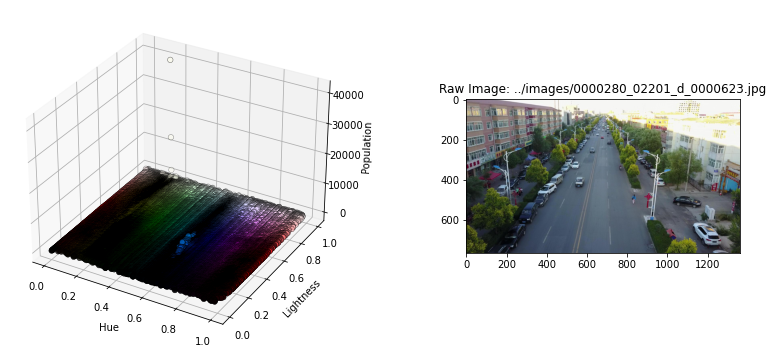

There are 152071 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 329801
This represents 31.70% of the total pixels in the image.
Average brightnes: 120.39106497500961
 2104 - SHARP - 0000280_02201_d_0000623.jpg

../images/0000283_01001_d_0000679.jpg


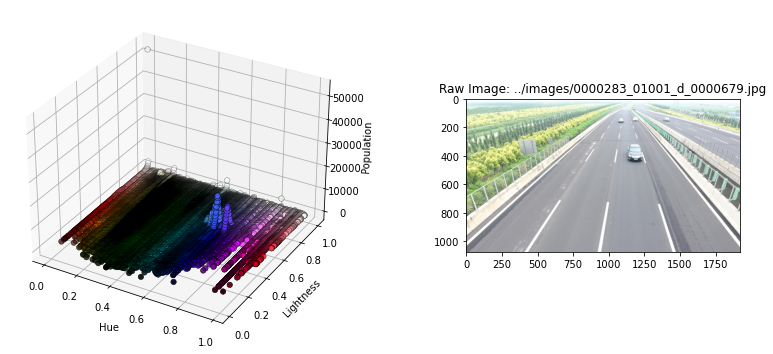

There are 138898 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 1213146
This represents 58.50% of the total pixels in the image.
Average brightnes: 189.67506317515432
 1121 - SHARP - 0000283_01001_d_0000679.jpg

../images/0000313_06401_d_0000468.jpg


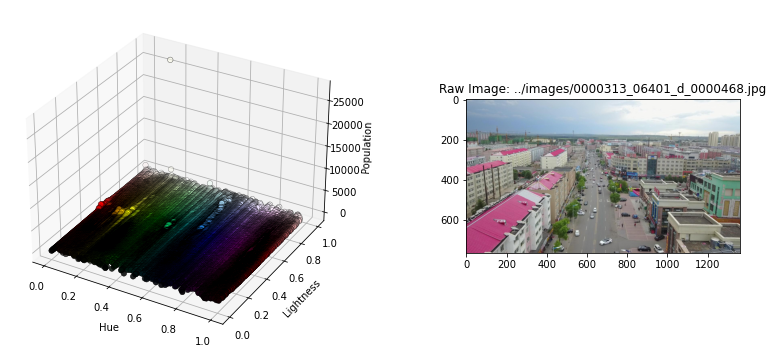

There are 126762 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 270282
This represents 25.98% of the total pixels in the image.
Average brightnes: 155.59430795847751
 1384 - SHARP - 0000313_06401_d_0000468.jpg

../images/0000313_06401_d_0000470.jpg


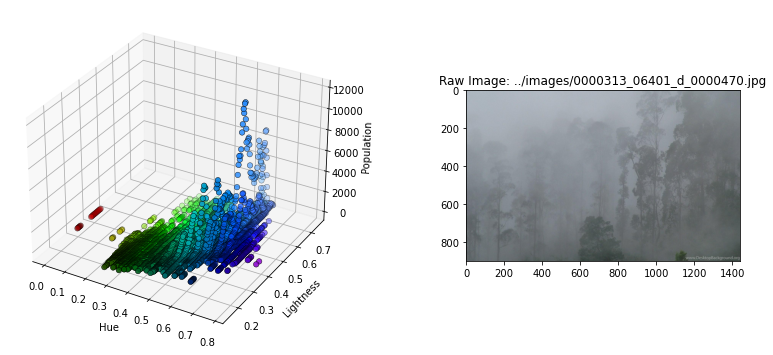

There are 5235 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 1219040
This represents 94.06% of the total pixels in the image.
Average brightnes: 136.2274938271605
  245 - FOGGY - 0000313_06401_d_0000470.jpg

../images/0000313_06401_d_0000471.jpg


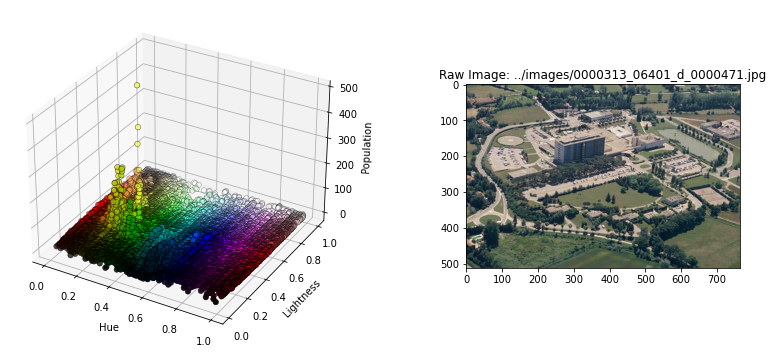

There are 66661 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 57300
This represents 14.62% of the total pixels in the image.
Average brightnes: 111.62849167712767
 2072 - SHARP - 0000313_06401_d_0000471.jpg

../images/0000313_06401_d_0000472.jpg


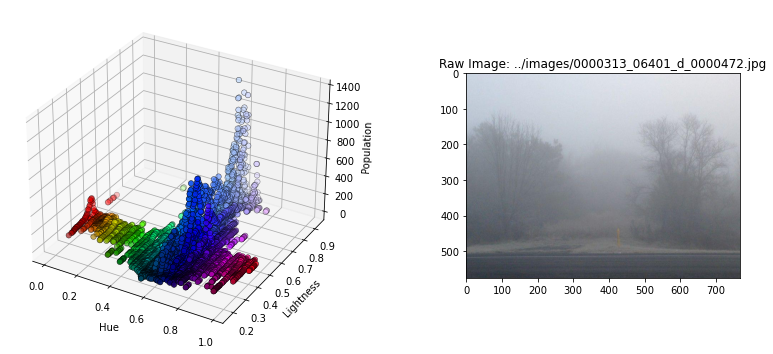

There are 9876 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 289444
This represents 65.43% of the total pixels in the image.
Average brightnes: 156.1531869393808
  131 - FOGGY - 0000313_06401_d_0000472.jpg

../images/0000313_06401_d_0000473.jpg


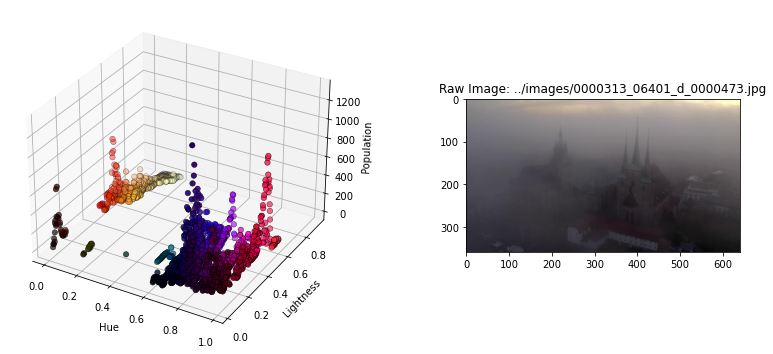

There are 3970 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 191468
This represents 83.10% of the total pixels in the image.
Average brightnes: 94.25908420138889
  164 - FOGGY - 0000313_06401_d_0000473.jpg

../images/0000313_06401_d_0000474.jpg


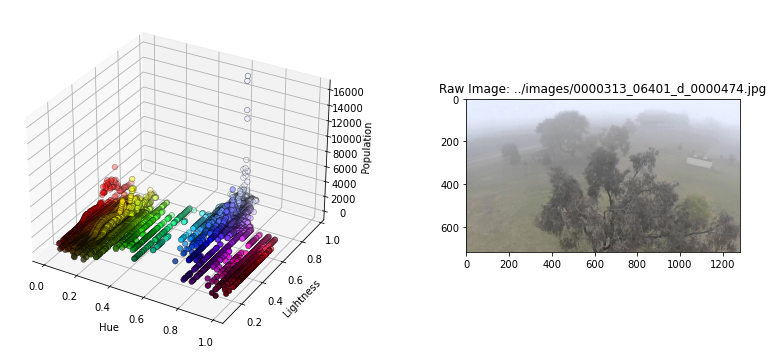

There are 9529 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 724562
This represents 78.62% of the total pixels in the image.
Average brightnes: 157.24611979166667
  419 - FOGGY - 0000313_06401_d_0000474.jpg

../images/0000313_06401_d_0000475.jpg


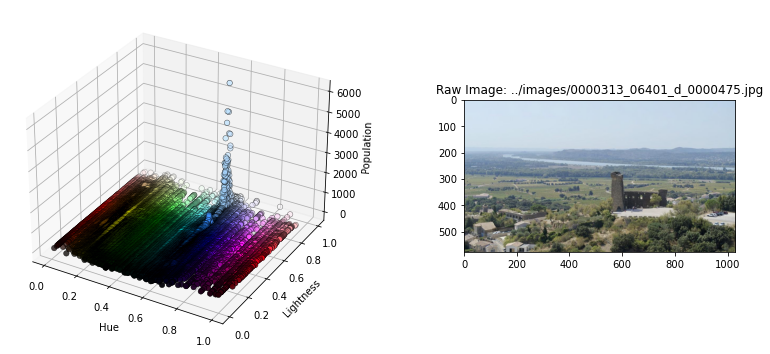

There are 61119 hue/lightness pairs in this image.
Population of 1000 hue/lightness pairs with the largest populations = 248981
This represents 41.75% of the total pixels in the image.
Average brightnes: 160.26014387041602
  803 - SHARP - 0000313_06401_d_0000475.jpg


In [12]:
for item in items:
    print("\n../images/" + item)
    image_histogram("../images/" + item, print_threshold_diagnostics = True)
    im = mpimg.imread("../images/" + item)
    print(f"Average brightnes: {avg_brightness(im)}")
    im = Image.open("../images/" + item).convert('L')
    var = slow_horizontal_variance(im)
    fog = var < 500    # FOG THRESHOLD
    print ('%5.0f - %5s - %s' % (var, fog and 'FOGGY' or 'SHARP', item))

In [13]:
from PIL import Image
import glob

def slow_horizontal_variance(im):
    '''Return average variance of horizontal lines of a grayscale image'''
    width, height = im.size
    if not width or not height: return 0
    vars = []
    pix = im.load()
    for y in range(height):
        row = [pix[x,y] for x in range(width)]
        mean = sum(row)/width
        variance = sum([(x-mean)**2 for x in row])/width
        vars.append(variance)
    return sum(vars)/height

for fn in glob.glob('../images/*.jpg'):
    im = Image.open(fn).convert('L')
    var = slow_horizontal_variance(im)
    fog = var < 500    # FOG THRESHOLD
    print ('%5.0f - %5s - %s' % (var, fog and 'FOGGY' or 'SHARP', fn))

 2208 - SHARP - ../images/0000001_05499_d_0000010.jpg
 1453 - SHARP - ../images/0000021_00500_d_0000002.jpg
 1764 - SHARP - ../images/0000055_00000_d_0000109.jpg
  780 - SHARP - ../images/0000069_00713_d_0000003.jpg
  799 - SHARP - ../images/0000117_00112_d_0000087.jpg
  970 - SHARP - ../images/0000117_01326_d_0000088.jpg
  733 - SHARP - ../images/0000117_01731_d_0000089.jpg
 1049 - SHARP - ../images/0000117_02708_d_0000090.jpg
 1024 - SHARP - ../images/0000117_03096_d_0000091.jpg
 1157 - SHARP - ../images/0000216_00520_d_0000001.jpg
 2443 - SHARP - ../images/0000276_05001_d_0000532.jpg
 2104 - SHARP - ../images/0000280_02201_d_0000623.jpg
 1121 - SHARP - ../images/0000283_01001_d_0000679.jpg
 1384 - SHARP - ../images/0000313_06401_d_0000468.jpg
  245 - FOGGY - ../images/0000313_06401_d_0000470.jpg
 2072 - SHARP - ../images/0000313_06401_d_0000471.jpg
  131 - FOGGY - ../images/0000313_06401_d_0000472.jpg
  164 - FOGGY - ../images/0000313_06401_d_0000473.jpg
  419 - FOGGY - ../images/00

In [21]:
from PIL import Image, ImageOps
import glob

def slow_vertical_variance(im):
    '''Return average variance of horizontal lines of a grayscale image'''
    width, height = im.size
    if not width or not height: return 0
    vars = []
    pix = im.load()
    for x in range(width):
        column = [pix[x,y] for y in range(height)]
        mean = sum(column)/height
        variance = sum([(y-mean)**2 for y in column])/height
        vars.append(variance)
    return sum(vars)/width

for fn in glob.glob('../images/*.jpg'):
    im = Image.open(fn).convert('L')
    var = slow_vertical_variance(im)
    fog = var < 500    # FOG THRESHOLD
    print ('%5.0f - %5s - %s' % (var, fog and 'FOGGY' or 'SHARP', fn))

 2205 - SHARP - ../images/0000001_05499_d_0000010.jpg
 2254 - SHARP - ../images/0000021_00500_d_0000002.jpg
 2178 - SHARP - ../images/0000055_00000_d_0000109.jpg
 1090 - SHARP - ../images/0000069_00713_d_0000003.jpg
  701 - SHARP - ../images/0000117_00112_d_0000087.jpg
  927 - SHARP - ../images/0000117_01326_d_0000088.jpg
  982 - SHARP - ../images/0000117_01731_d_0000089.jpg
  970 - SHARP - ../images/0000117_02708_d_0000090.jpg
  815 - SHARP - ../images/0000117_03096_d_0000091.jpg
 1105 - SHARP - ../images/0000216_00520_d_0000001.jpg
 3118 - SHARP - ../images/0000276_05001_d_0000532.jpg
 3561 - SHARP - ../images/0000280_02201_d_0000623.jpg
 1531 - SHARP - ../images/0000283_01001_d_0000679.jpg


UnidentifiedImageError: cannot identify image file '../images/0000313_06401_d_0000188.jpg'

In [20]:
from os import listdir
from PIL import Image
   
for filename in listdir('../images/'):
    if filename.endswith('.jpg'):
        try:
            img = Image.open('../images/'+ filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename) # print out the names of corrupt files

Bad file: 0000313_06401_d_0000188.jpg
Bad file: 0000313_06401_d_0000488.jpg


## References

- [Using Python to find corrupted images](https://opensource.com/article/17/2/python-tricks-artists)

- [Python Script to find corrupted image files](https://gist.github.com/tim-peters/905bd710be0d4b6606fa6aa6242aaffb)

- [PYTHON SCRIPT TO DETECT CORRUPT IMAGE FILES (.JPG)](http://www.irishbloke.net/?p=2146)

- [How I Built an Image Classifier with Absolutely No Machine Learning](https://towardsdatascience.com/how-i-built-an-image-classifier-with-absolutely-no-machine-learning-1480d77d9d3f)

- [Targeting and Removing Bad Training Data](https://towardsdatascience.com/targeting-and-removing-bad-training-data-8ccdac5e7cc3)

- [Foggy images detection [closed]](https://stackoverflow.com/questions/48969813/foggy-images-detection)

- 